# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
-0.001
-0.002
0.0
0.0
0.0
0.0
0.001
0.0
0.0
-0.001
-0.003
-0.003
-0.003
-0.003
-0.003
-0.002
-0.001
-0.001
-0.002
-0.002
-0.002
-0.001
-0.002
-0.005
-0.005
-0.007
-0.003
-0.005
-0.005
-0.005
0.994
0.993
0.991
0.992
2.004
2.005
2.003
2.004
3.002
3.003
3.005
3.004
3.008
3.008
4.012
4.011
4.011
4.011
5.013
5.016
5.017
5.016
5.016
6.023
6.023
6.023
6.025
6.685
6.687
6.684
6.684
7.349
7.349
7.349
7.349
8.35
8.355
8.356
8.355
8.356
9.361
9.358
9.358
9.358
10.334
10.338
10.337
10.338
10.339
11.341
11.342
11.346
11.346
11.345
12.354
12.354
12.35
12.35
12.352
13.359
13.359
13.354
13.356
14.272
14.274
14.275
14.275
14.276
15.195
15.198
15.199
15.195
15.197
16.206
16.205
16.204
17.208
17.206
17.206
17.207
17.207
18.205
18.205
18.203
18.206
19.212
19.212
19.211
19.211
20.21
20.21
20.209
20.209
21.214
21.214
21.215
21.804
21.802
21.801
22.388
22.388
22.387
22.386
23.395
23.395
23.392
23.392
24.399
24.397
24.396
24.398
24.398
25.403
25.401
25.4
26.405
26.405
26.404
26.404
27.409
27.409
27.40

57.268
57.267
57.267
57.267
57.267
57.267
57.268
57.267
57.267
57.268
57.267
57.264
57.264
57.264
57.264
57.264
57.318
57.374
57.431
57.456
57.485
57.484
57.484
57.484
57.501
57.501
57.5
57.5
57.499
57.499
57.498
57.499
57.499
57.499
57.498
57.497
57.497
57.497
57.5
57.499
57.499
57.497
57.498
57.497
57.498
57.496
57.498
57.498
57.495
57.495
57.495
57.495
57.496
57.495
57.495
57.495
57.495
57.495
57.494
57.494
57.495
57.495
57.495
57.495
57.495
57.495
57.495
57.492
57.492
57.492
57.492
57.564
57.61
57.609
57.609
57.622
57.622
57.622
57.622
57.622
57.623
57.623
57.623
57.623
57.621
57.621
57.621
57.621
57.621
57.623
57.625
57.622
57.622
57.622
57.622
57.62
57.619
57.619
57.62
57.62
57.62
57.62
57.619
57.62
57.62
57.62
57.62
57.619
57.619
57.619
57.619
57.619
57.618
57.618
57.618
57.618
57.618
57.618
57.619
57.618
57.616
57.616
57.615
57.615
57.64
57.756
57.757
57.755
57.755
57.753
57.766
57.767
57.766
57.766
57.769
57.764
57.763
57.767
57.767
57.765
57.765
57.765
57.765
57.766
57.765
57

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,-0.001
3,6,-0.002
4,8,0.000
...,...,...
1461,2922,60.271
1462,2924,60.271
1463,2926,60.271
1464,2928,60.271


<IPython.core.display.Javascript object>


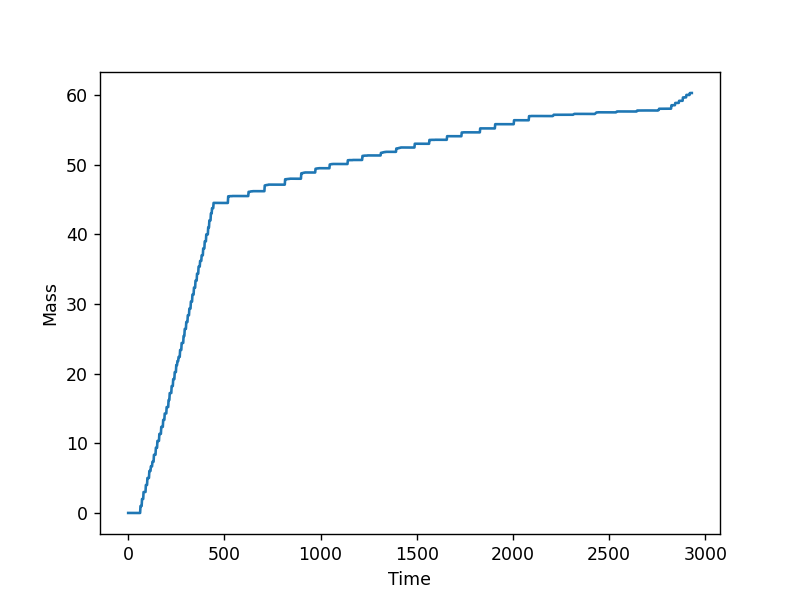

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_280323_S229-234.csv')